In [52]:
from sympy import *
from sympy.matrices import *
init_printing(use_latex=true)
import operator, functools

t1,t2,t3,t4,t5,t6,l1,l2,l3,d1,d2,d3,d4,d5,d6 = symbols('\\theta_1, \\theta_2, \\theta_3, \\theta_4, \\theta_5, \\theta_6, l_1,l_2,l_3,d_1,d_2,d_3,d_4,d_5,d_6')
x,y,z = symbols('x,y,z')

def dhs(a,alpha,d,theta):
    M = Matrix([[cos(theta),-sin(theta)*cos(alpha),sin(theta)*sin(alpha),a*cos(theta)],
                  [sin(theta),cos(theta)*cos(alpha),-cos(theta)*sin(alpha),a*sin(theta)],
                  [0,sin(alpha),cos(alpha),d],
                  [0,0,0,1]])
    return M

class Manipulator(object):
    def __init__(self,*args):
        self.Ts = []
        self.type = []
        for k in args:
            self.Ts.append(dhs(k[0],k[1],k[2],k[3]))
            if len(k)>4:
                self.type.append(k[4])
            else:
                self.type.append('r')
        self.dof = len(args)
    
    def z(self,i):
        if i == 0: return Matrix([[0],[0],[1]])
        MTH = eye(4)
        for k in range(i):
            MTH = MTH*self.Ts[k]
        return MTH[:3,2]
    
    def p(self,i):
        if i == 0: return Matrix([[0],[0],[0]])
        MTH = eye(4)
        for k in range(i):
            MTH = MTH*self.Ts[k]
        return MTH[:3,3]
    
    @property
    def J(self):
        n = self.dof
        M_ = zeros(6,n)
        for i in range(self.dof):
            if self.type[i]=='r':
                jp = self.z(i).cross(self.p(n) - self.p(i))
                jo = self.z(i)
            else:
                jp = self.z(i)
                jo = zeros(3,1)
            jp = jp.col_join(jo)
            M_[:,i] = jp
        return simplify(M_)
    
    @property
    def T(self):
        return simplify(functools.reduce(operator.mul, self.Ts))

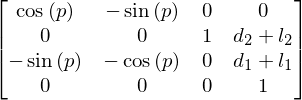

In [53]:
PP = Manipulator((0,-pi/2,d1+l1,0,'p'),(0,0,d2+l2,'p'))
PP.T

0.0 0.0
1.0 1.0
2.0 2.0
3.0 3.0
4.0 4.0


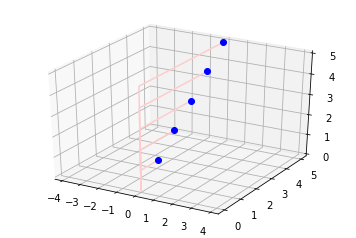

In [59]:
import numpy as np 
import matplotlib.pyplot as plt
from numpy import sin,cos,tan,arcsin,arccos,arctan,arctan2,sqrt,pi
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

def dh(a,alpha,d,theta):
    M = np.array([[cos(theta),-sin(theta)*cos(alpha),sin(theta)*sin(alpha),a*cos(theta)],
                  [sin(theta),cos(theta)*cos(alpha),-cos(theta)*sin(alpha),a*sin(theta)],
                  [0,sin(alpha),cos(alpha),d],
                  [0,0,0,1]])
    return M

l1,l2 = 1, 1
D1,D2 = [], []
y = np.linspace(1,5,5)
z = y
puntos = list(zip(y,z))

for punto in puntos:
    y_,z_ = punto[0], punto[1]
    d1,d2 = z_ - l1, y_ - l2
    D1.append(d1)
    D2.append(d2)
    print(d1,d2)
    # FK
    T1_0 = dh(0,-pi/2,d1+l1,0)
    T2_1 = dh(0,0,d2+l2,0)
    T2_0 = np.dot(T1_0,T2_1)
    A = np.array([T1_0[0][3],T1_0[1][3],T1_0[2][3]])
    B = np.array([T2_0[0][3],T2_0[1][3],T2_0[2][3]])
    plt.plot([0,A[0],B[0]],[0,A[1],B[1]],[0,A[2],B[2]],color='#FFCCCC')
    plt.plot([B[0]],[B[1]],[B[2]],'bo')
    plt.grid('on')
    plt.axis('equal');